# 주성분 분석 (PCA)
- 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법
- 이러한 방향을 주성분이라 부름
- 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있으며 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작음

## 차원 축소(특성 축소)
- 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류
- 차원 축소는 저장 공간을 줄이고 시각화하기 쉬우며 다른 알고리즘의 성능을 높일 수도 있음

## 설명된 분산
- 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것
- 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있음

- 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있음

In [1]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

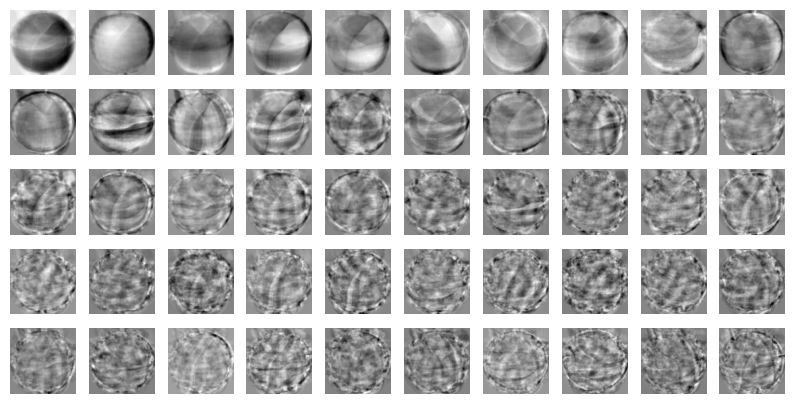

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

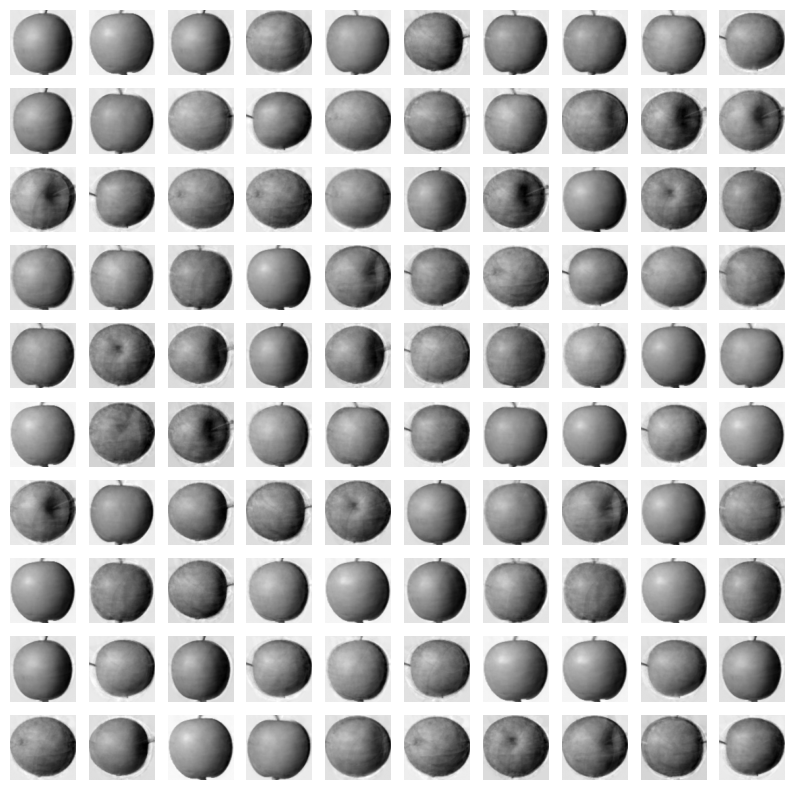

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [18]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486383, 0.00480347,
       0.00447838, 0.00437312, 0.00408041, 0.00389476, 0.00372429,
       0.00359289, 0.00331467, 0.00317857, 0.00304305, 0.00303754,
       0.00288914, 0.00275796, 0.00264999, 0.00255471, 0.00252089,
       0.0024744 , 0.00239583, 0.00230771, 0.00221562, 0.00216583,
       0.00213766, 0.00196448, 0.00193046, 0.00190595, 0.001835  ,
       0.0018313 , 0.00171484, 0.00167949, 0.00163012, 0.00161992])

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.18686008, 0.18785405, 0.21739483, 0.25291371, 0.22391677]), 'score_time': array([0.0020535 , 0.00210857, 0.00341916, 0.00218415, 0.00229979]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [23]:
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.18373275, 0.19448161, 0.18267345, 0.19170642, 0.20507622]), 'score_time': array([0.00210142, 0.00358653, 0.00274181, 0.00337195, 0.00221848]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [25]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [26]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.09096098, 0.01933241, 0.01744342, 0.01299572, 0.02245855]),
 'score_time': array([0.00073767, 0.00054336, 0.00047731, 0.00050759, 0.00052714]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [28]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [29]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

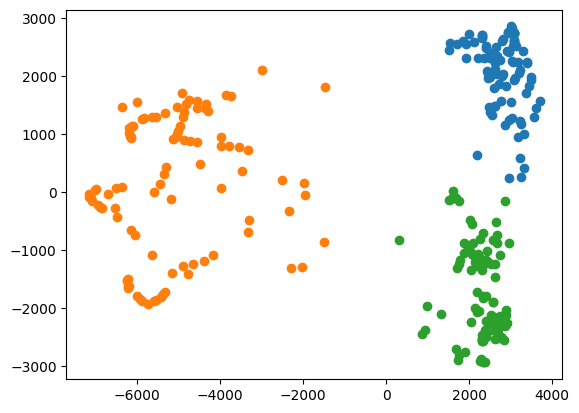

In [30]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])